In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel("D:/MoH/Moh-Diag-Data.xlsx")
df.head()

,CIVIL_ID,PATIENT_EN_NAME,PATIENT_AR_NAME,GENDER,NATIONALITY_EN,NATIONALITY_AR,BIRTH_DATE,AGE,BLOOD_TYPE,VISIT_NO,...,LABORATORY_TEST,RADIOLOGY_EXAM,NUCLEAR_INVESTIGATION,DIAGNOSIS_ICD,DIAGNOSIS_CANCER_TYPE,DIAGNOSIS_TYPE,MEDICATION,DOSAGE,FREQ,DURATION
0,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,و+,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,14
1,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,و+,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,CASPOfungin (Cancidas®) 50mg Vial,1.0,1,7
2,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,و+,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,Piperacillin\tazobactam (Tazocin®) 4.5gm Vial,1.0,3,14
3,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,و+,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,7
4,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,و+,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,QUEtiapine (SEROquel®) 25mg Tablet,1.0,1,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048001 entries, 0 to 1048000
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   CIVIL_ID               1048001 non-null  int64         
 1   PATIENT_EN_NAME        1048001 non-null  object        
 2   PATIENT_AR_NAME        1048001 non-null  object        
 3   GENDER                 1048001 non-null  object        
 4   NATIONALITY_EN         1048001 non-null  object        
 5   NATIONALITY_AR         1048001 non-null  object        
 6   BIRTH_DATE             1048001 non-null  datetime64[ns]
 7   AGE                    1048001 non-null  int64         
 8   BLOOD_TYPE             1047517 non-null  object        
 9   VISIT_NO               1048001 non-null  int64         
 10  VISIT_TYPE             1048001 non-null  object        
 11  VISIT_DATE             1048001 non-null  datetime64[ns]
 12  LABORATORY_TEST        10480

In [4]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1047996     True
1047997     True
1047998     True
1047999     True
1048000     True
Length: 1048001, dtype: bool

In [5]:
df['GENDER'].unique()


array(['Male', 'Female'], dtype=object)

C:\Users\a.essam\AppData\Local\Temp\ipykernel_3924\2815092132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")


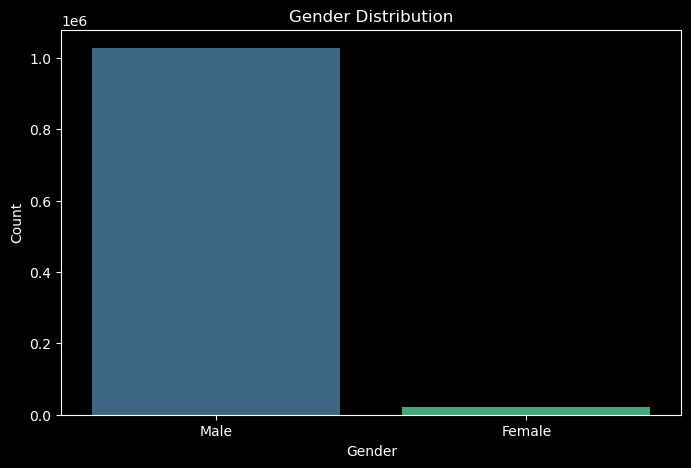

In [6]:
plt.style.use('dark_background')
gender_counts = df['GENDER'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [7]:
df.describe()

,CIVIL_ID,BIRTH_DATE,AGE,VISIT_NO,VISIT_DATE,DOSAGE,FREQ,DURATION
count,1.048001e+06,1048001,1.048001e+06,1.048001e+06,1048001,1.048001e+06,1.048001e+06,1.048001e+06
mean,2.609812e+11,1961-06-28 14:26:48.958006784,6.209860e+01,9.388064e+06,2023-09-18 20:05:30.064101632,9.085061e+00,1.693601e+00,1.766524e+01
min,2.361230e+11,1936-12-30 00:00:00,2.100000e+01,9.385514e+06,2023-09-13 00:00:00,5.000000e-01,1.000000e+00,1.000000e+00
25%,2.630803e+11,1963-08-03 00:00:00,6.000000e+01,9.388273e+06,2023-09-19 09:33:22,1.000000e+00,1.000000e+00,7.000000e+00
50%,2.630803e+11,1963-08-03 00:00:00,6.000000e+01,9.388273e+06,2023-09-19 09:33:22,1.000000e+00,1.000000e+00,1.000000e+01
75%,2.630803e+11,1963-08-03 00:00:00,6.000000e+01,9.388273e+06,2023-09-19 09:33:22,2.000000e+00,3.000000e+00,3.000000e+01
max,3.020622e+11,2002-06-22 00:00:00,8.600000e+01,9.390214e+06,2023-09-24 00:00:00,7.000000e+02,6.000000e+00,9.000000e+01
std,5.387207e+09,NaN,5.388315e+00,7.736495e+02,NaN,2.086940e+01,8.987139e-01,1.833060e+01


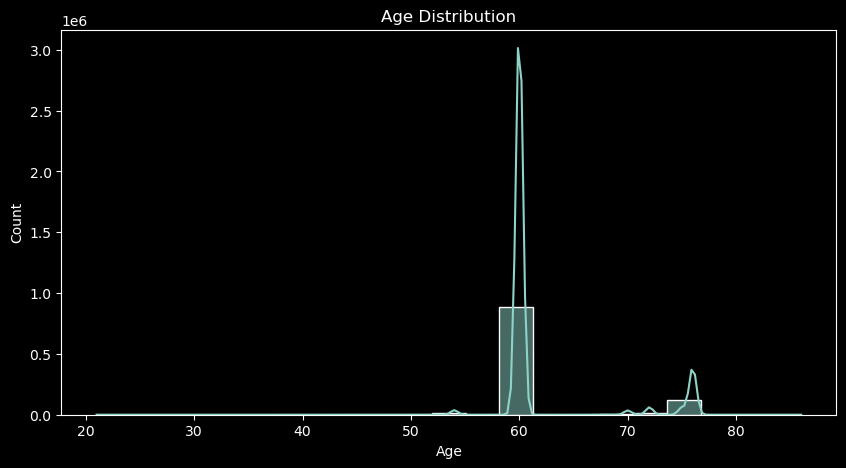

In [8]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['AGE'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

C:\Users\a.essam\AppData\Local\Temp\ipykernel_3924\3736491001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BLOOD_TYPE', data=df, palette='viridis', order=df['BLOOD_TYPE'].value_counts().index)


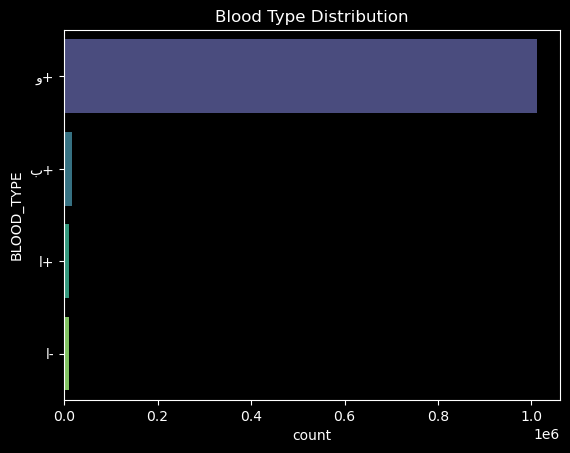

In [9]:
# Blood Type Distribution
sns.countplot(y='BLOOD_TYPE', data=df, palette='viridis', order=df['BLOOD_TYPE'].value_counts().index)
plt.title('Blood Type Distribution')
plt.show()

C:\Users\a.essam\AppData\Local\Temp\ipykernel_3924\2855073009.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='DIAGNOSIS_CANCER_TYPE', data=df, palette='magma', order=df['DIAGNOSIS_CANCER_TYPE'].value_counts().index)


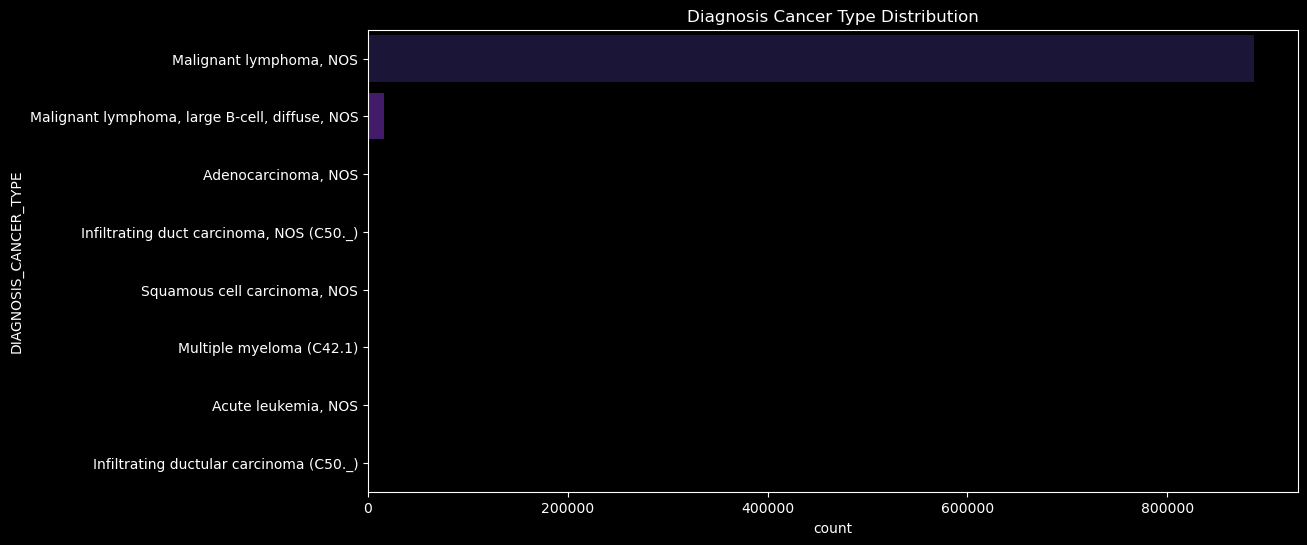

In [10]:
# Diagnosis Cancer Type Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='DIAGNOSIS_CANCER_TYPE', data=df, palette='magma', order=df['DIAGNOSIS_CANCER_TYPE'].value_counts().index)
plt.title('Diagnosis Cancer Type Distribution')
plt.show()

C:\Users\a.essam\AppData\Local\Temp\ipykernel_3924\4016427145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DIAGNOSIS_CANCER_TYPE', y='DOSAGE', data=df, palette='coolwarm')


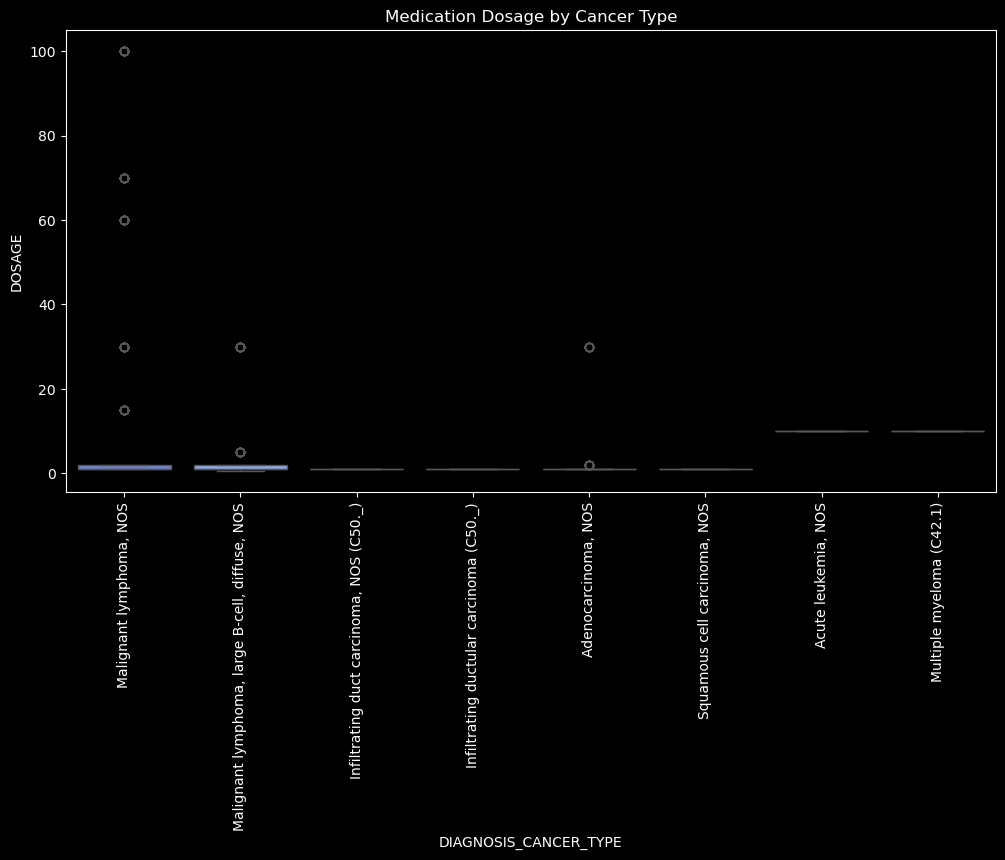

In [11]:
# Medication Dosage by Cancer Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='DIAGNOSIS_CANCER_TYPE', y='DOSAGE', data=df, palette='coolwarm')
plt.title('Medication Dosage by Cancer Type')
plt.xticks(rotation=90)
plt.show()

In [12]:
df['BLOOD_TYPE'].unique()

array(['و+', 'ب+', 'ا+', nan, 'ا-'], dtype=object)

In [13]:
blood_type_mapping = {
    "ا": "A",
    "ا-": "A-",
    "ب+": "B+",
    "و+": "O+",
    "ا+": "A+"
}

df['BLOOD_TYPE'] = df['BLOOD_TYPE'].replace(blood_type_mapping)

# Check if the values are replaced correctly
print(df['BLOOD_TYPE'].unique())


['O+' 'B+' 'A+' nan 'A-']


C:\Users\a.essam\AppData\Local\Temp\ipykernel_3924\3736491001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BLOOD_TYPE', data=df, palette='viridis', order=df['BLOOD_TYPE'].value_counts().index)


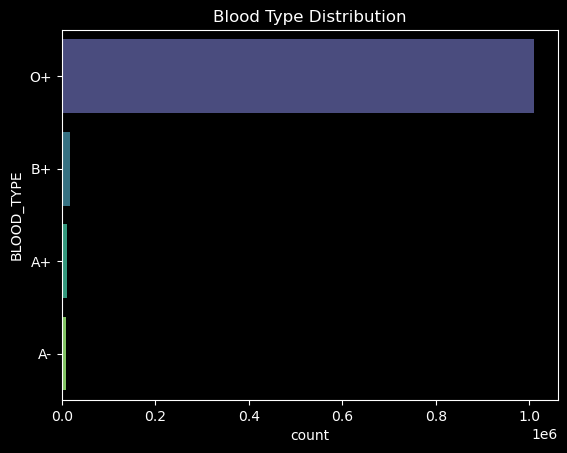

In [14]:
# Blood Type Distribution
sns.countplot(y='BLOOD_TYPE', data=df, palette='viridis', order=df['BLOOD_TYPE'].value_counts().index)
plt.title('Blood Type Distribution')
plt.show()

C:\Users\a.essam\AppData\Local\Temp\ipykernel_3924\3991331062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='NATIONALITY_EN', order=df['NATIONALITY_EN'].value_counts().index, palette='viridis')


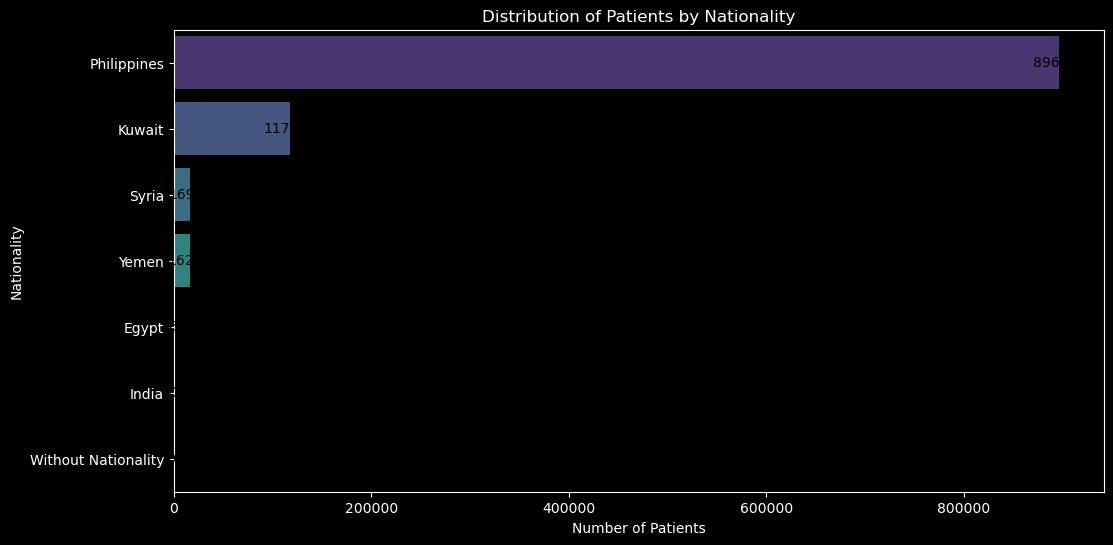

In [15]:
plt.figure(figsize=(12, 6))
# sns.set_theme(style="whitegrid")

# Plot a barplot for nationality distribution
ax = sns.countplot(data=df, y='NATIONALITY_EN', order=df['NATIONALITY_EN'].value_counts().index, palette='viridis')

# Add counts on each bar
for p in ax.patches:
    count = int(p.get_width())  
    ax.annotate(f'{count}', (p.get_width() + 10, p.get_y() + p.get_height() / 2), 
                ha='center', va='center', fontsize=10, color='black')

# Add labels and title
plt.xlabel("Number of Patients")
plt.ylabel("Nationality")
plt.title("Distribution of Patients by Nationality")

# Show the plot
plt.show()


In [16]:
df

,CIVIL_ID,PATIENT_EN_NAME,PATIENT_AR_NAME,GENDER,NATIONALITY_EN,NATIONALITY_AR,BIRTH_DATE,AGE,BLOOD_TYPE,VISIT_NO,...,LABORATORY_TEST,RADIOLOGY_EXAM,NUCLEAR_INVESTIGATION,DIAGNOSIS_ICD,DIAGNOSIS_CANCER_TYPE,DIAGNOSIS_TYPE,MEDICATION,DOSAGE,FREQ,DURATION
0,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,O+,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,14
1,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,O+,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,CASPOfungin (Cancidas®) 50mg Vial,1.0,1,7
2,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,O+,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,Piperacillin\tazobactam (Tazocin®) 4.5gm Vial,1.0,3,14
3,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,O+,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,7
4,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,O+,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,QUEtiapine (SEROquel®) 25mg Tablet,1.0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047996,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,O+,9388273,...,PCT,XR chest PA,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,metOLazone (Zaroxolyn ®) 5mg Tablet,1.0,1,15
1047997,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,O+,9388273,...,PCT,XR chest PA,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,Fondaparinux (Arixtra®) 2.5mg/0.5mL PFS,2.0,1,30
1047998,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,O+,9388273,...,PCT,XR chest PA,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,metroNIDAZOLE (Flagyl®) 500mg/100mL Vial,1.0,3,7
1047999,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,Male,Philippines,فلبينى,1963-08-03,60,O+,9388273,...,PCT,XR chest PA,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,Vitamin B1 (Thiamine HCl) 100mg/2mL Ampoule,1.0,1,5


In [17]:
df['GENDER'] = df['GENDER'].map({'Male': 0, 'Female': 1})

In [18]:
# Map each blood type to a unique integer value
blood_type_mapping = {
    'A': 0, 'A-': 1, 'B+': 2, 'O+': 3, 'O-': 4, 'AB+': 5, 'AB-': 6
    # Add other blood types if needed
}
df['BLOOD_TYPE'] = df['BLOOD_TYPE'].map(blood_type_mapping)

In [19]:
le = LabelEncoder()

df['NATIONALITY_EN'] = le.fit_transform(df['NATIONALITY_EN'])

In [20]:
df

,CIVIL_ID,PATIENT_EN_NAME,PATIENT_AR_NAME,GENDER,NATIONALITY_EN,NATIONALITY_AR,BIRTH_DATE,AGE,BLOOD_TYPE,VISIT_NO,...,LABORATORY_TEST,RADIOLOGY_EXAM,NUCLEAR_INVESTIGATION,DIAGNOSIS_ICD,DIAGNOSIS_CANCER_TYPE,DIAGNOSIS_TYPE,MEDICATION,DOSAGE,FREQ,DURATION
0,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,14
1,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,CASPOfungin (Cancidas®) 50mg Vial,1.0,1,7
2,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,Piperacillin\tazobactam (Tazocin®) 4.5gm Vial,1.0,3,14
3,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,7
4,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,"Coagulation Profile (PT, APTT)",US Abdomen & Pelvis,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,QUEtiapine (SEROquel®) 25mg Tablet,1.0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047996,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,PCT,XR chest PA,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,metOLazone (Zaroxolyn ®) 5mg Tablet,1.0,1,15
1047997,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,PCT,XR chest PA,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,Fondaparinux (Arixtra®) 2.5mg/0.5mL PFS,2.0,1,30
1047998,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,PCT,XR chest PA,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,metroNIDAZOLE (Flagyl®) 500mg/100mL Vial,1.0,3,7
1047999,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,PCT,XR chest PA,FDG PET Scan for Tumor Imaging,Blood,"Malignant lymphoma, NOS",Cancer Diagnosis,Vitamin B1 (Thiamine HCl) 100mg/2mL Ampoule,1.0,1,5


In [21]:
df['LABORATORY_TEST'].unique()

array(['Coagulation Profile (PT, APTT)',
       'Liver Profile (TP, ALT, ALB, ALP, AST, D-Bil, T-Bil, GGT)',
       'Adjusted Calcium Profile (Ca, Alb, Adjusted Ca)',
       'CBC & Automated Differential',
       'Renal Profile (RFT), Radiology (Cr, EGFR, Urea)',
       'Renal Function Test & Electrolytes (RFT & Lytes)  (Cl, Cr, EGFR, Glu, K, Na, Urea)',
       'Lactate Dehydrogenase (LDH)', 'Magnesium ', 'Phosphorus', 'CEA',
       'CA19.9', 'Serum Electrolytes (lytes) (Cl, K, Na) ',
       'DIC Profile(Blood Film, PT, APTT, D-Dimer, FIB)',
       'Blood Culture Peripheral', 'PCT', 'Uric Acid (UA)', 'Bowel',
       'Vit D', 'Vit B12', 'Lung, biopsy', 'Pathology Review',
       'Molecular-Comprehensive Gene Panel - NGS',
       'Thyroid Function Test (FT4, TSH)',
       'Venous Blood Gas Analysis (VBG) (PH,PCo2,PO2,CHCO3,CHCO3-st )',
       'Ammonia', 'G6PD', 'Troponin', 'Lactate', 'Potassium (K)',
       'Stomach, biopsy', 'CA15.3', 'D-Dimer', 'WBC Differential count',
       'Fibrino

In [22]:
df['MEDICATION'].unique()

array(['ANIDULAfungin (Ecalta®) 100mg Vial',
       'CASPOfungin (Cancidas®) 50mg Vial',
       'Piperacillin\\tazobactam (Tazocin®) 4.5gm Vial',
       'QUEtiapine (SEROquel®) 25mg Tablet',
       'Fondaparinux (Arixtra®) 2.5mg/0.5mL PFS',
       'Colistimethate Sodium (Colomycin®) 150mg Vial',
       'Atorvastatin (Lipitor®) 20mg Tablet',
       'STO-70MM COLOSTOMY OPENED BAG SURFIT',
       'MEROpenem (Meronem®) 500mg Vial',
       'metOLazone (Zaroxolyn ®) 5mg Tablet',
       'metroNIDAZOLE (Flagyl®) 500mg/100mL Vial',
       'Vitamin B1 (Thiamine HCl) 100mg/2mL Ampoule',
       'Bisoprolol (Concor®Cor) 2.5mg Tablet',
       'SENSURA COLOSTOMY BASEPLATE CONVEX EXT W/EAR 70MM',
       'STO-57MM UROSTOMY BAG SURFIT', 'BRAVA STOMAHESIVE POWDER',
       'BRAVA SKIN BARRIER WIPES',
       'ECHOSAN MEDICAL ADHESIVE REMOVER SPRAY',
       'STO-STOMAHESIVE PASTE 2OZ', 'STO-57MM COLOSTOMY BASE SURFIT',
       'STO-70MM COLOSTOMY BASE SURFIT',
       'Allopurinol (Zyloric®) 100mg Tablet',
  

In [23]:
df['DIAGNOSIS_CANCER_TYPE'].unique()

array(['Malignant lymphoma, NOS',
       'Malignant lymphoma, large B-cell, diffuse, NOS',
       'Infiltrating duct carcinoma, NOS (C50._)', nan,
       'Infiltrating ductular carcinoma (C50._)', 'Adenocarcinoma, NOS',
       'Squamous cell carcinoma, NOS', 'Acute leukemia, NOS',
       'Multiple myeloma (C42.1)'], dtype=object)

In [24]:
df['DIAGNOSIS_CANCER_TYPE'] = le.fit_transform(df['DIAGNOSIS_CANCER_TYPE'])

In [25]:
import re

# Extract active ingredient
df['Active_Ingredient'] = df['MEDICATION'].apply(lambda x: re.findall(r'^[^ (]+', x)[0])

# Extract brand name
df['Brand_Name'] = df['MEDICATION'].apply(lambda x: re.findall(r'\(([^)]+)\)', x)[0] if '(' in x else None)

# Extract dosage
df['Dosage'] = df['MEDICATION'].apply(lambda x: re.findall(r'\d+mg|\d+mcg|\d+mL|\d+ IU', x)[0] if re.search(r'\d+mg|\d+mcg|\d+mL|\d+ IU', x) else None)

# Extract form
df['Form'] = df['MEDICATION'].apply(lambda x: re.findall(r'Tablet|Capsule|Ampoule|Vial|Syrup|Cream|Patch|Ointment|Drops|Nebulising Susp|Plaster|Solution|Suspension|Effervescent Tablet|Chewable Tablet|Injection|Enema|Pen|Bottle', x)[0] if re.search(r'Tablet|Capsule|Ampoule|Vial|Syrup|Cream|Patch|Ointment|Drops|Nebulising Susp|Plaster|Solution|Suspension|Effervescent Tablet|Chewable Tablet|Injection|Enema|Pen|Bottle', x) else None)


In [26]:
df

,CIVIL_ID,PATIENT_EN_NAME,PATIENT_AR_NAME,GENDER,NATIONALITY_EN,NATIONALITY_AR,BIRTH_DATE,AGE,BLOOD_TYPE,VISIT_NO,...,DIAGNOSIS_CANCER_TYPE,DIAGNOSIS_TYPE,MEDICATION,DOSAGE,FREQ,DURATION,Active_Ingredient,Brand_Name,Dosage,Form
0,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,4,Cancer Diagnosis,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,14,ANIDULAfungin,Ecalta®,100mg,Vial
1,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,4,Cancer Diagnosis,CASPOfungin (Cancidas®) 50mg Vial,1.0,1,7,CASPOfungin,Cancidas®,50mg,Vial
2,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,4,Cancer Diagnosis,Piperacillin\tazobactam (Tazocin®) 4.5gm Vial,1.0,3,14,Piperacillin\tazobactam,Tazocin®,None,Vial
3,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,4,Cancer Diagnosis,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,7,ANIDULAfungin,Ecalta®,100mg,Vial
4,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,4,Cancer Diagnosis,QUEtiapine (SEROquel®) 25mg Tablet,1.0,1,7,QUEtiapine,SEROquel®,25mg,Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047996,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,4,Cancer Diagnosis,metOLazone (Zaroxolyn ®) 5mg Tablet,1.0,1,15,metOLazone,Zaroxolyn ®,5mg,Tablet
1047997,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,4,Cancer Diagnosis,Fondaparinux (Arixtra®) 2.5mg/0.5mL PFS,2.0,1,30,Fondaparinux,Arixtra®,5mg,None
1047998,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,4,Cancer Diagnosis,metroNIDAZOLE (Flagyl®) 500mg/100mL Vial,1.0,3,7,metroNIDAZOLE,Flagyl®,500mg,Vial
1047999,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,4,Cancer Diagnosis,Vitamin B1 (Thiamine HCl) 100mg/2mL Ampoule,1.0,1,5,Vitamin,Thiamine HCl,100mg,Ampoule


In [27]:
df['Dosage'].unique()

array(['100mg', '50mg', None, '25mg', '5mg', '150mg', '20mg', '500mg',
       '50mL', '800mg', '200mg', '12mg', '300mL', '100mL', '40mg', '6mg',
       '457mg', '8mg', '10mg', '120mg', '600mg', '120mL', '2mg', '250mg',
       '75mg', '250mcg', '6mL', '450mg', '42mg', '1000mg', '50mcg',
       '300mg', '4mL', '80mg', '1mg', '15mg', '000 IU'], dtype=object)

In [28]:
df[['Dosage_Value', 'Dosage_Unit']] = df['Dosage'].str.extract(r'(\d+)([a-zA-Z]*)')

df['Dosage_Value'] = pd.to_numeric(df['Dosage_Value'], errors='coerce')

In [29]:
df.head()

,CIVIL_ID,PATIENT_EN_NAME,PATIENT_AR_NAME,GENDER,NATIONALITY_EN,NATIONALITY_AR,BIRTH_DATE,AGE,BLOOD_TYPE,VISIT_NO,...,MEDICATION,DOSAGE,FREQ,DURATION,Active_Ingredient,Brand_Name,Dosage,Form,Dosage_Value,Dosage_Unit
0,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,14,ANIDULAfungin,Ecalta®,100mg,Vial,100.0,mg
1,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,CASPOfungin (Cancidas®) 50mg Vial,1.0,1,7,CASPOfungin,Cancidas®,50mg,Vial,50.0,mg
2,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,Piperacillin\tazobactam (Tazocin®) 4.5gm Vial,1.0,3,14,Piperacillin\tazobactam,Tazocin®,None,Vial,NaN,NaN
3,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,7,ANIDULAfungin,Ecalta®,100mg,Vial,100.0,mg
4,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,QUEtiapine (SEROquel®) 25mg Tablet,1.0,1,7,QUEtiapine,SEROquel®,25mg,Tablet,25.0,mg


In [30]:
df['Dosage_Unit'] = le.fit_transform(df['Dosage_Unit'])

In [31]:
df

,CIVIL_ID,PATIENT_EN_NAME,PATIENT_AR_NAME,GENDER,NATIONALITY_EN,NATIONALITY_AR,BIRTH_DATE,AGE,BLOOD_TYPE,VISIT_NO,...,MEDICATION,DOSAGE,FREQ,DURATION,Active_Ingredient,Brand_Name,Dosage,Form,Dosage_Value,Dosage_Unit
0,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,14,ANIDULAfungin,Ecalta®,100mg,Vial,100.0,3
1,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,CASPOfungin (Cancidas®) 50mg Vial,1.0,1,7,CASPOfungin,Cancidas®,50mg,Vial,50.0,3
2,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,Piperacillin\tazobactam (Tazocin®) 4.5gm Vial,1.0,3,14,Piperacillin\tazobactam,Tazocin®,None,Vial,NaN,4
3,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,ANIDULAfungin (Ecalta®) 100mg Vial,1.0,1,7,ANIDULAfungin,Ecalta®,100mg,Vial,100.0,3
4,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,QUEtiapine (SEROquel®) 25mg Tablet,1.0,1,7,QUEtiapine,SEROquel®,25mg,Tablet,25.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047996,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,metOLazone (Zaroxolyn ®) 5mg Tablet,1.0,1,15,metOLazone,Zaroxolyn ®,5mg,Tablet,5.0,3
1047997,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,Fondaparinux (Arixtra®) 2.5mg/0.5mL PFS,2.0,1,30,Fondaparinux,Arixtra®,5mg,None,5.0,3
1047998,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,metroNIDAZOLE (Flagyl®) 500mg/100mL Vial,1.0,3,7,metroNIDAZOLE,Flagyl®,500mg,Vial,500.0,3
1047999,263080303902,DANIL JR DELA CRUZ GARCIA,دانيلو جىار ديلاكروز جارسيا,0,3,فلبينى,1963-08-03,60,3.0,9388273,...,Vitamin B1 (Thiamine HCl) 100mg/2mL Ampoule,1.0,1,5,Vitamin,Thiamine HCl,100mg,Ampoule,100.0,3


In [32]:
df['Active_Ingredient'] = le.fit_transform(df['Active_Ingredient'])
df['Brand_Name'] = le.fit_transform(df['Brand_Name'])

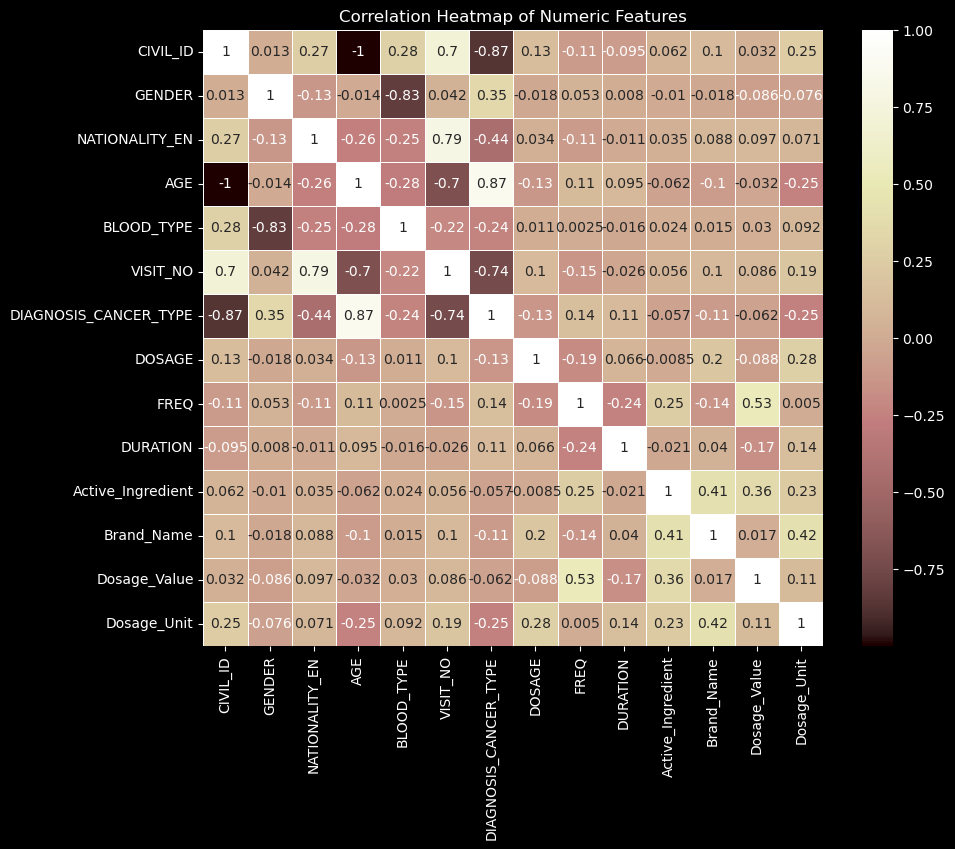

In [33]:
numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='pink', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [34]:


df = numeric_df.drop(columns=['VISIT_NO', 'CIVIL_ID'])


df = df.dropna()

# Separate features and target variable
X = df.drop(columns=['DURATION'])
y = df['DURATION']

# Handle categorical variables with one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
X_train

,GENDER,NATIONALITY_EN,AGE,BLOOD_TYPE,DIAGNOSIS_CANCER_TYPE,DOSAGE,FREQ,Active_Ingredient,Brand_Name,Dosage_Value,Dosage_Unit
252774,0,3,60,3.0,4,2.0,2,93,89,200.0,3
305000,0,3,60,3.0,4,1.0,1,108,95,500.0,3
786812,0,3,60,3.0,4,1.0,1,4,5,500.0,3
1011503,0,3,60,3.0,4,1.0,2,24,21,150.0,3
637100,0,3,60,3.0,4,1.0,1,97,92,100.0,3
...,...,...,...,...,...,...,...,...,...,...,...
395779,0,3,60,3.0,4,2.0,1,4,5,500.0,3
550411,0,2,76,3.0,8,1.0,2,17,18,200.0,3
199520,0,3,60,3.0,4,2.0,1,93,89,200.0,3
998594,0,3,60,3.0,4,1.0,1,93,89,200.0,3


### 1. Predictive Modeling for Treatment Duration

In [36]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R²: {r2_lr}")


Linear Regression - MSE: 376.02452581773616, R²: 0.15149010834592114


In [37]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MSE: 6.378543710833128, R²: 0.9856066371702222


In [38]:
# Gradient Boosting Regressor Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb}, R²: {r2_gb}")


Gradient Boosting - MSE: 24.880146129500318, R²: 0.943857252260953


### Clustering for Patient Segmentation

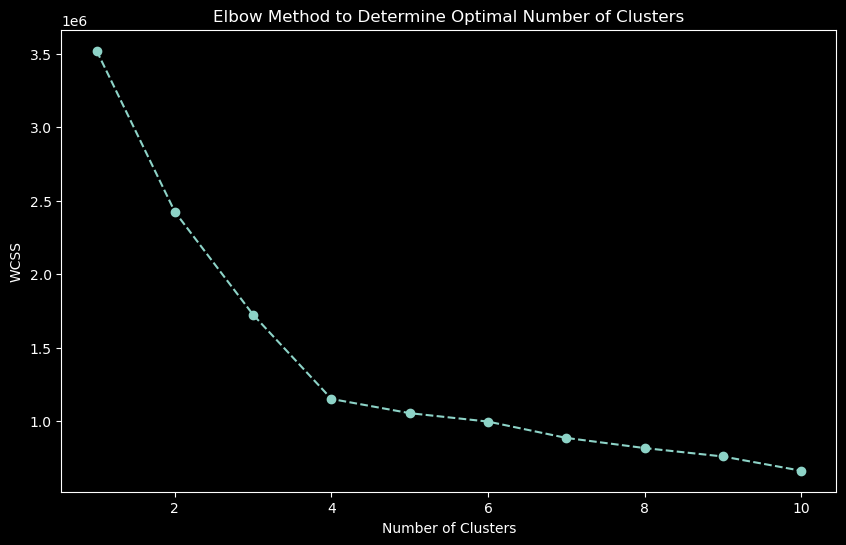

Cluster Analysis (Mean of Each Feature by Cluster):
                AGE  Dosage_Value      FREQ  Active_Ingredient  Brand_Name
Cluster                                                                  
0        75.344313    173.589540  1.879302          50.375479   53.522642
1        60.020414    130.925709  1.383995          82.682691   86.846957
2        60.274358    539.390739  2.988072          83.829571   51.868423
3        60.102374    107.971781  1.148739          17.795608   26.416846


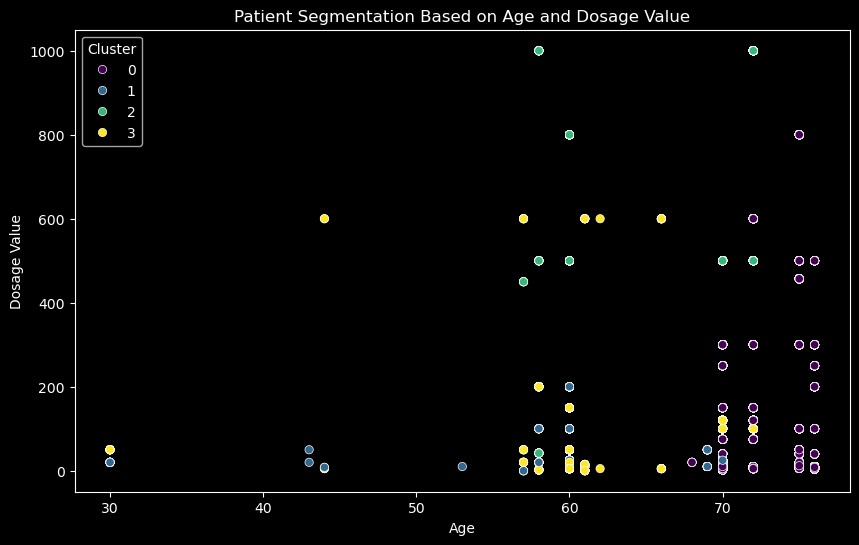

In [39]:


# Step 1: Select relevant numeric columns for clustering
numeric_features = ['AGE', 'Dosage_Value', 'FREQ', 'Active_Ingredient', 'Brand_Name']
numeric_df = df[numeric_features]

# Step 2: Handle missing values (drop or fill)
# Here, we'll drop rows with NaNs for simplicity, but you can impute as necessary
numeric_df = numeric_df.dropna()

# Step 3: Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 4: Determine the optimal number of clusters (Elbow method)
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to decide the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

# Step 5: Apply KMeans Clustering
# Assuming 4 clusters based on the elbow curve (change as needed)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels back to the original data
df['Cluster'] = clusters

# Step 6: Analyze the clusters
# Calculate cluster-wise mean for each feature to understand the segments
cluster_analysis = df.groupby('Cluster')[numeric_features].mean()
print("Cluster Analysis (Mean of Each Feature by Cluster):\n", cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['AGE'], y=df['Dosage_Value'], hue=df['Cluster'], palette='viridis')
plt.title("Patient Segmentation Based on Age and Dosage Value")
plt.xlabel("Age")
plt.ylabel("Dosage Value")
plt.legend(title="Cluster")
plt.show()

### Dosage Optimization Analysis

Mean Squared Error: 15.69078708025944
R-squared: 0.9996580061101029


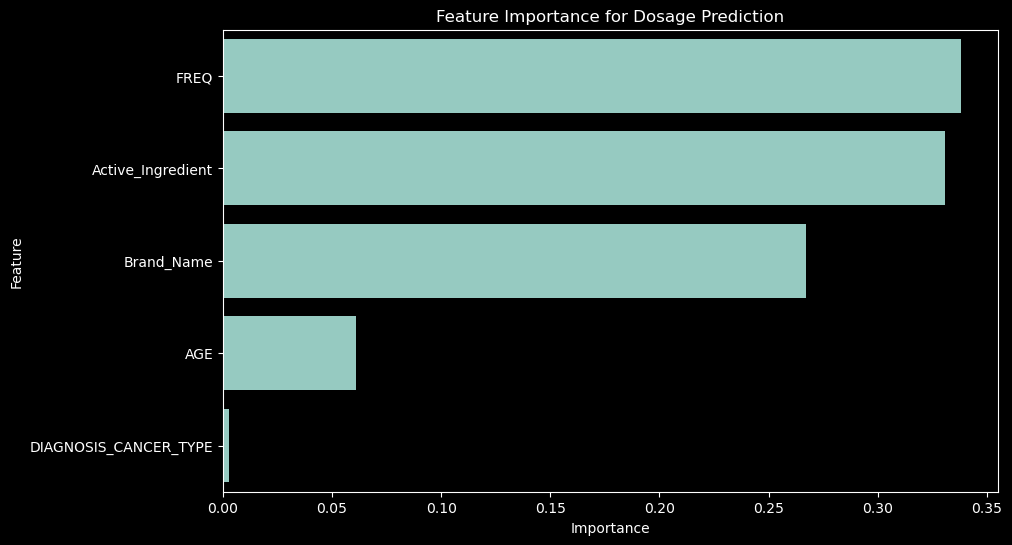

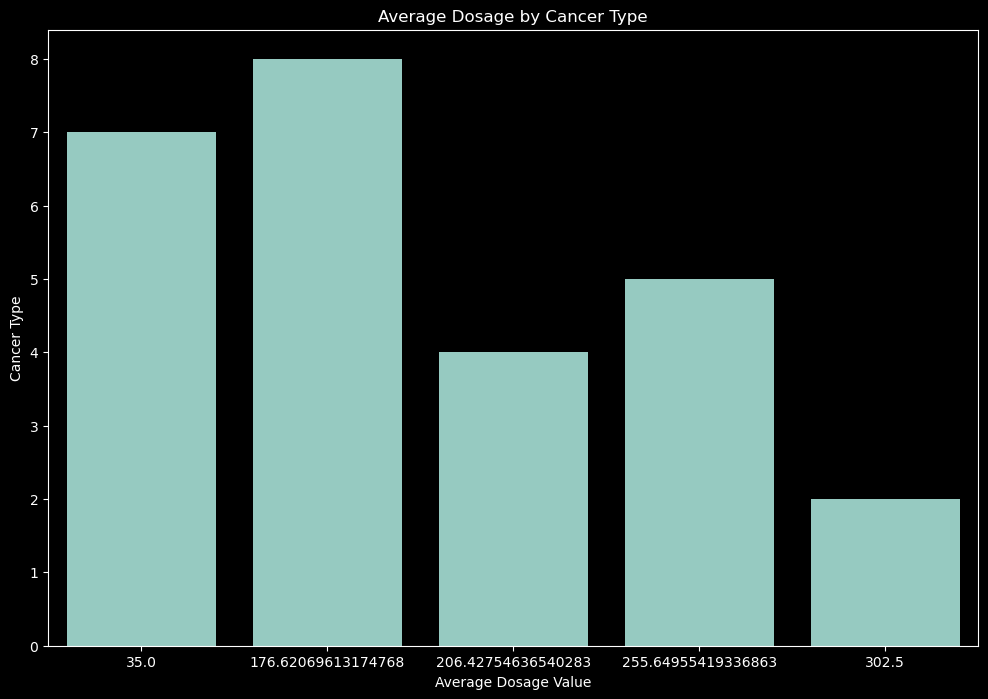

In [40]:

# Select features relevant to dosage prediction
X = df[['AGE', 'DIAGNOSIS_CANCER_TYPE', 'FREQ', 'Active_Ingredient', 'Brand_Name']]
y = df['Dosage_Value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Feature Importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Dosage Prediction')
plt.show()

# Analyzing Dosage by Cancer Type
cancer_dosage = df.groupby('DIAGNOSIS_CANCER_TYPE')['Dosage_Value'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=cancer_dosage.values, y=cancer_dosage.index)
plt.title('Average Dosage by Cancer Type')
plt.xlabel('Average Dosage Value')
plt.ylabel('Cancer Type')
plt.show()

### Correlation Analysis of Dosage Unit vs. Age and Cancer Type

Correlation Matrix:
                            AGE  DIAGNOSIS_CANCER_TYPE  Dosage_Unit
AGE                    1.000000               0.953430    -0.238252
DIAGNOSIS_CANCER_TYPE  0.953430               1.000000    -0.215244
Dosage_Unit           -0.238252              -0.215244     1.000000


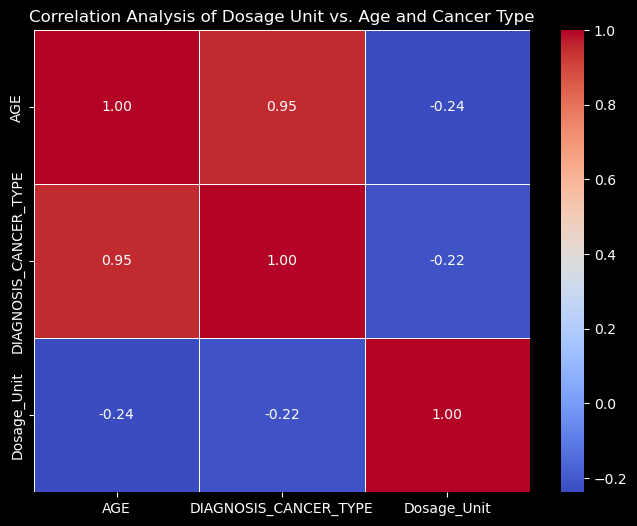

In [42]:
# Select relevant columns
correlation_df = df[['AGE', 'DIAGNOSIS_CANCER_TYPE', 'Dosage_Unit']]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap for visual representation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Analysis of Dosage Unit vs. Age and Cancer Type")
plt.show()